In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

# REGULAR

In [2]:
path = 'reg2.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].max())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup

df["efficiency"] = df["speedup"] / df["proc"]

df["karp"] = (1 / df["speedup"] - 1 / df["proc"]) / (1 - 1 / df["proc"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

,mode,size,time,pi,proc,speedup,efficiency,karp
0,regular,5,0.496273,0.000126,1,1.000000,1.000000,0.000000
1,regular,5,0.254056,0.000504,2,1.953395,0.976697,0.023859
2,regular,5,0.169380,0.001129,3,2.929941,0.976647,0.011956
3,regular,5,0.125174,0.002011,4,3.964668,0.991167,0.002971
4,regular,6,5.019614,0.000013,1,1.000000,1.000000,0.000000
5,regular,6,2.531408,0.000050,2,1.982934,0.991467,0.008607
6,regular,6,1.653807,0.000113,3,3.035188,1.011729,-0.005797
7,regular,6,1.191113,0.000201,4,4.214223,1.053556,-0.016944
8,regular,7,51.204632,0.000001,1,1.000000,1.000000,0.000000
9,regular,7,24.715595,0.000005,2,2.071754,1.035877,-0.034634


### TIME

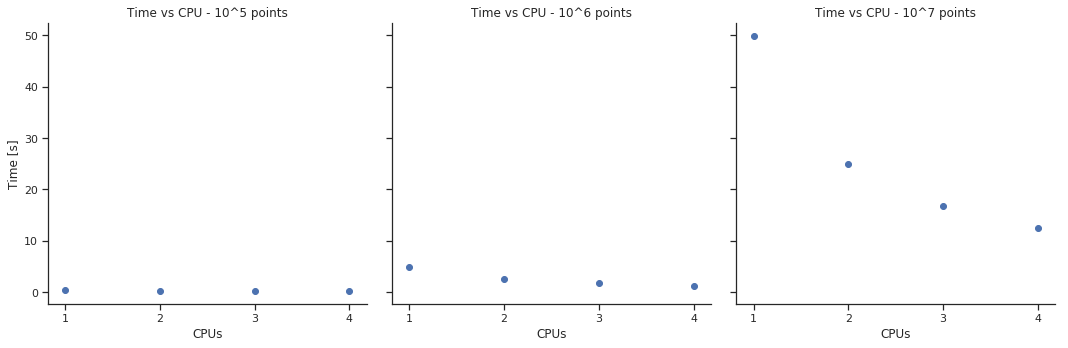

In [310]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "time")
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=[1,2,3,4])

### SPEEDUP

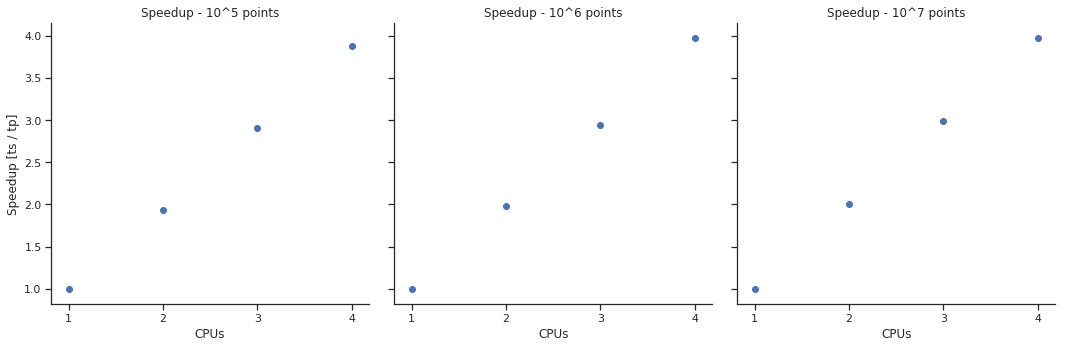

In [309]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "speedup")
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=[1,2,3,4])

### EFFICIENCY

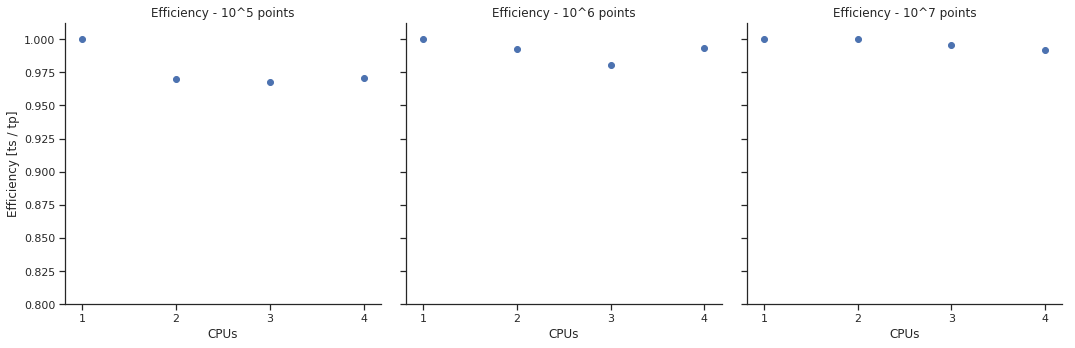

In [308]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "efficiency")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(ylim=(0.8, None))
g.set(xticks=[1,2,3,4])

### SERIAL FRACTION

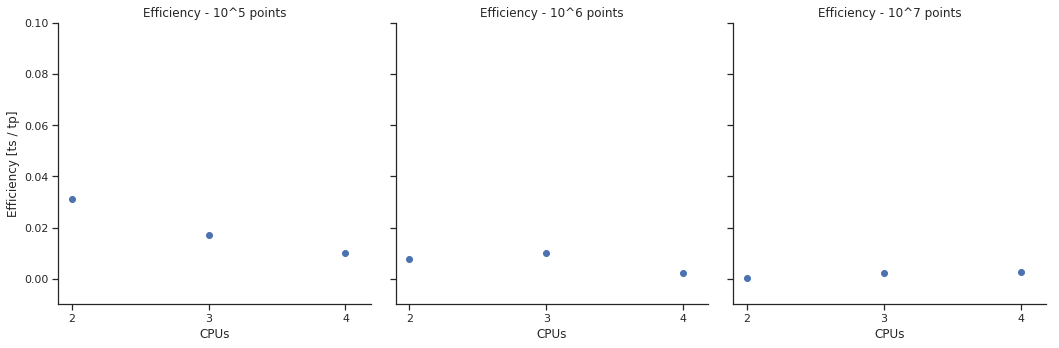

In [307]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "karp")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(ylim=(-0.01, 0.1))
g.set(xlim=(1.9, None))
g.set(xticks=[2,3,4])

# SCALED

In [324]:
path = 'scale.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].max())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup * df["proc"]

df["efficiency"] = df["speedup"] / df["proc"]

df["karp"] = (1 / df["speedup"] - 1 / df["proc"]) / (1 - 1 / df["proc"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

,mode,size,time,pi,proc,speedup,efficiency,karp
0,scale,5,0.501687,3.145160,1,1.037323,1.037323,0.000000
1,scale,5,0.503943,3.139780,2,2.065360,1.032680,-0.031646
2,scale,5,0.499239,3.139933,3,3.127229,1.042410,-0.020342
3,scale,5,0.520412,3.144580,4,4.000000,1.000000,0.000000
4,scale,6,4.972286,3.141692,1,1.010501,1.010501,0.000000
5,scale,6,5.024500,3.139950,2,2.000000,1.000000,0.000000
6,scale,6,4.959278,3.141263,3,3.039454,1.013151,-0.006490
7,scale,6,4.611870,3.141994,4,4.357885,1.089471,-0.027375
8,scale,7,49.550388,3.141750,1,1.010818,1.010818,0.000000
9,scale,7,50.086436,3.141567,2,2.000000,1.000000,0.000000


### TIME

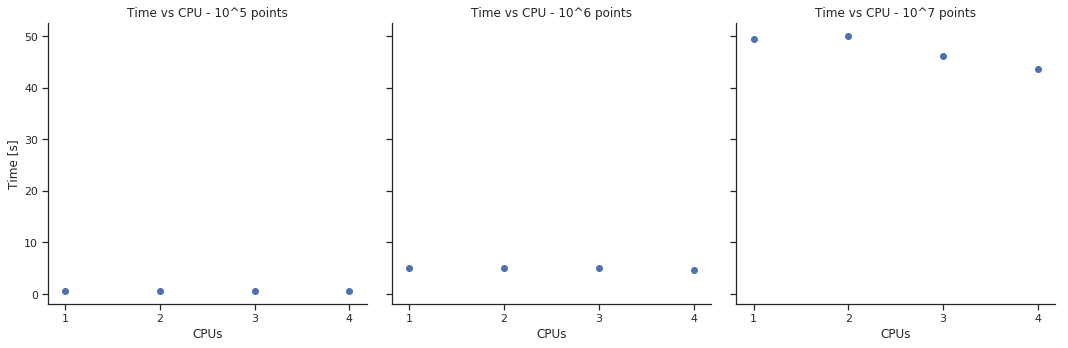

In [325]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "time")
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=[1,2,3,4])

### SPEEDUP

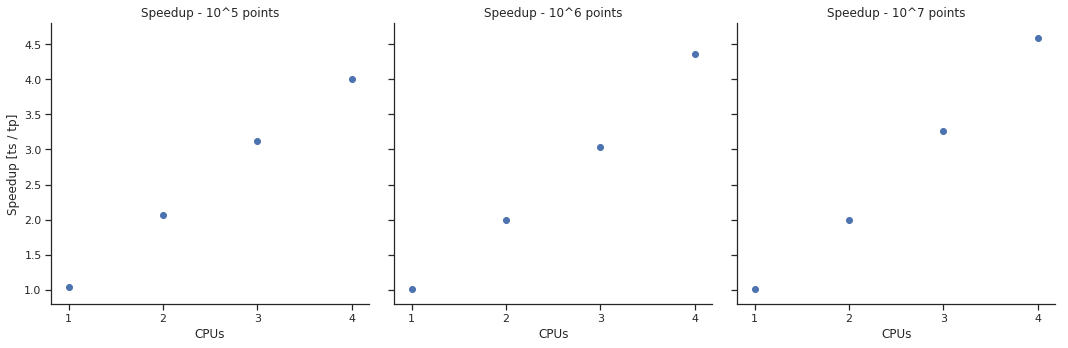

In [326]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "speedup")
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=[1,2,3,4])

### EFFICIENCY

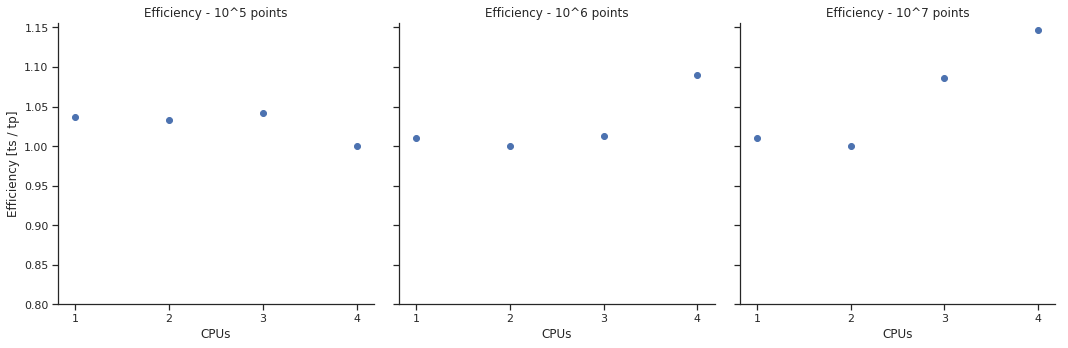

In [327]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "efficiency")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(ylim=(0.8, None))
g.set(xticks=[1,2,3,4])

### SERIAL FRACTION

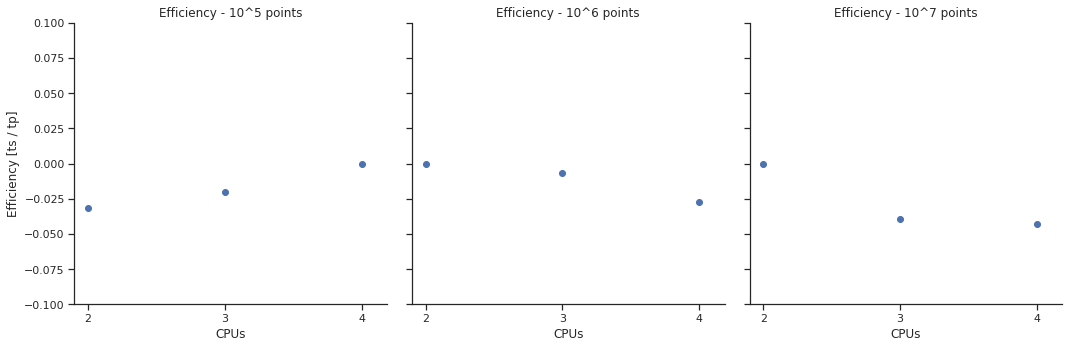

In [330]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "proc", "karp")
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xlim=(1.9, None))
g.set(ylim=(-0.1, 0.1))
g.set(xticks=[2,3,4])